# Right Align Previously Generated Figures

### Imports

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from lfp_tools import (
    general as lfp_general,
    startup as lfp_startup,
    development as lfp_development,
    analysis as lfp_analysis
)
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import s3fs
import utils.behavioral_utils as behavioral_utils
import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.io_utils as io_utils
import utils.visualization_utils as visualization_utils
from trial_splitters.random_splitter import RandomSplitter
from trial_splitters.block_splitter import BlockSplitter
from sklearn import svm
import matplotlib

matplotlib.rcParams['figure.dpi'] = 150


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
species = 'nhp'
subject = 'SA'
exp = 'WCST'
session = 20180802  # this is the session for which there are spikes at the moment. 

fs = s3fs.S3FileSystem()

### Feature Selections with Logistic Regressors

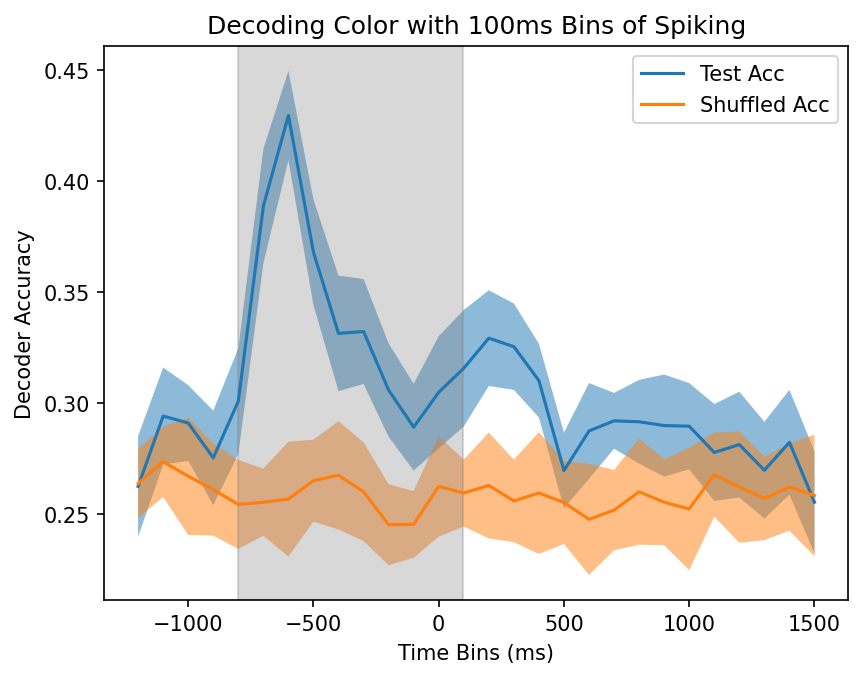

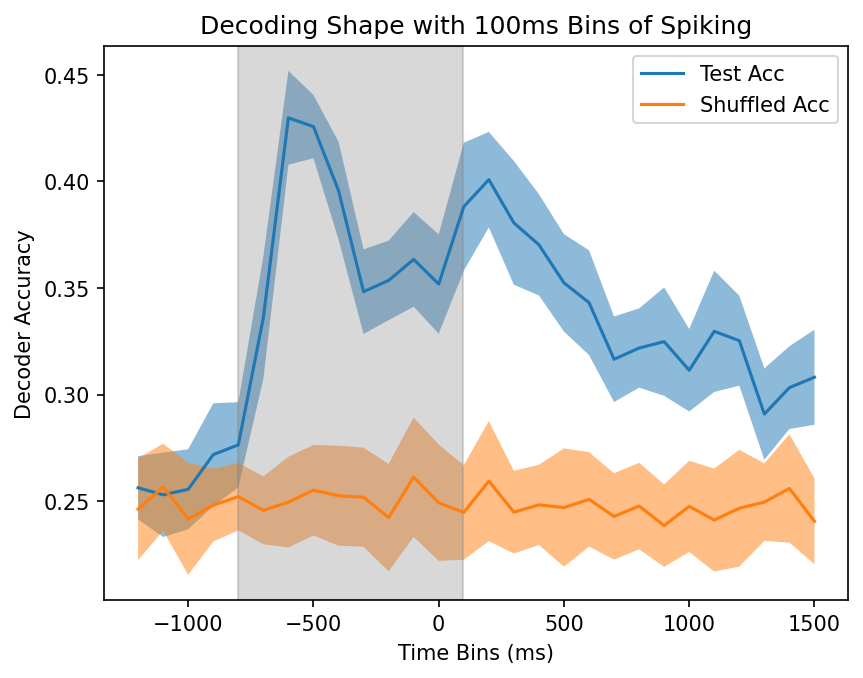

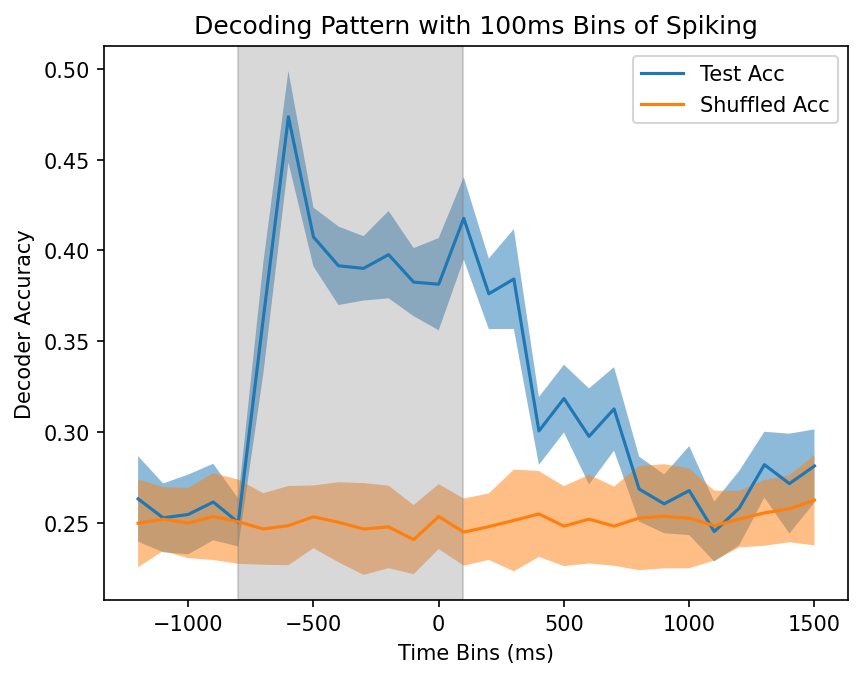

In [7]:
feature_dims = ["Color", "Shape", "Pattern"]
pre_interval = 1300
post_interval = 1500

for feature_dim in feature_dims:
    acc = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_lr_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))
    shuffled = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_lr_shuffled_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))

    # generate figures
    fig, ax = plt.subplots()
    visualization_utils.visualize_accuracy_across_time_bins(
        acc,
        pre_interval, post_interval, 100,
        ax,
        label="Test Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled,
        pre_interval, post_interval, 100,
        ax,
        label="Shuffled Acc",
        right_align=True
    )
    ax.axvspan(-800, 0, alpha=0.3, color='gray')
    ax.axvline(98, alpha=0.3, color='gray', linestyle='dashed')
    ax.set_xlabel("Time Bins (ms)")
    ax.set_ylabel("Decoder Accuracy")
    ax.set_title(f"Decoding {feature_dim} with 100ms Bins of Spiking")
    ax.legend()

### Feature Selections with SVMs

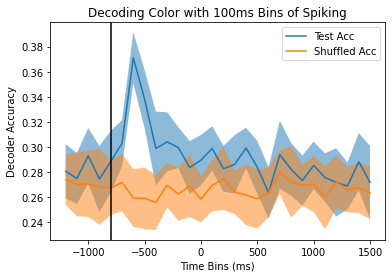

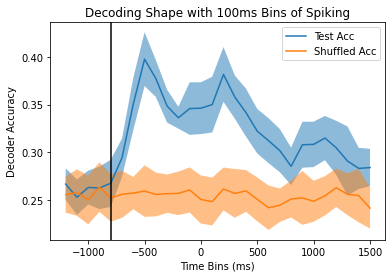

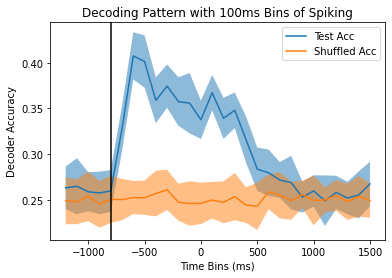

In [4]:
feature_dims = ["Color", "Shape", "Pattern"]
pre_interval = 1300
post_interval = 1500

for feature_dim in feature_dims:
    acc = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_svm_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))
    shuffled = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_svm_shuffled_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))

    # generate figures
    fig, ax = plt.subplots()
    visualization_utils.visualize_accuracy_across_time_bins(
        acc,
        pre_interval, post_interval, 100,
        ax,
        label="Test Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled,
        pre_interval, post_interval, 100,
        ax,
        label="Shuffled Acc",
        right_align=True
    )
    ax.axvline(-800, color='k')
    ax.set_xlabel("Time Bins (ms)")
    ax.set_ylabel("Decoder Accuracy")
    ax.set_title(f"Decoding {feature_dim} with 100ms Bins of Spiking")
    ax.legend()

### Logistic Regressors and SVMs plotted together

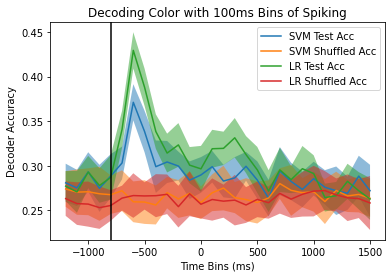

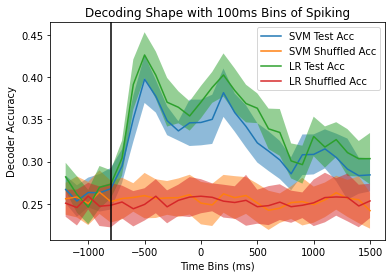

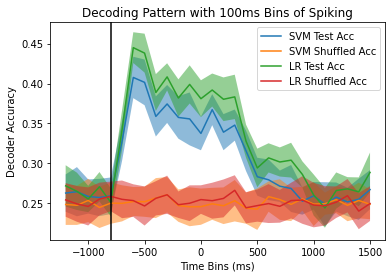

In [5]:
feature_dims = ["Color", "Shape", "Pattern"]
pre_interval = 1300
post_interval = 1500

for feature_dim in feature_dims:
    svm_acc = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_svm_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))
    svm_shuffled = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_svm_shuffled_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))

    lr_acc = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_lr_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))
    lr_shuffled = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_lr_shuffled_accs_{pre_interval}_fb_{post_interval}_by_bin_random_split.npy"))

    # generate figures
    fig, ax = plt.subplots()
    visualization_utils.visualize_accuracy_across_time_bins(
        svm_acc,
        pre_interval, post_interval, 100,
        ax,
        label="SVM Test Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        svm_shuffled,
        pre_interval, post_interval, 100,
        ax,
        label="SVM Shuffled Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        lr_acc,
        pre_interval, post_interval, 100,
        ax,
        label="LR Test Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        lr_shuffled,
        pre_interval, post_interval, 100,
        ax,
        label="LR Shuffled Acc",
        right_align=True
    )
    ax.axvline(-800, color='k')
    ax.set_xlabel("Time Bins (ms)")
    ax.set_ylabel("Decoder Accuracy")
    ax.set_title(f"Decoding {feature_dim} with 100ms Bins of Spiking")
    ax.legend()

### Fixations Aligned to Start

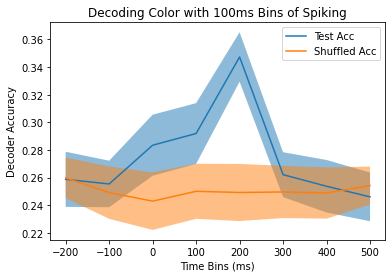

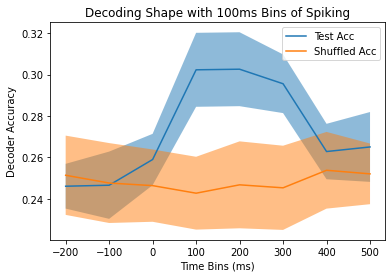

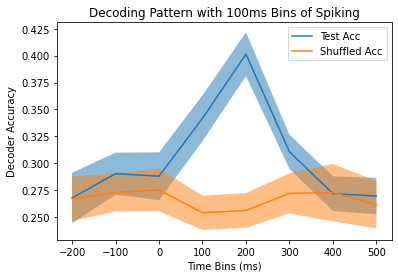

In [6]:
pre_interval = 300
post_interval = 500
feature_dims = ["Color", "Shape", "Pattern"]

for feature_dim in feature_dims:
    acc = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_accs_{pre_interval}_filtered_fixationstart_{post_interval}_by_bin_random_split.npy"))
    shuffled = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_shuffled_accs_{pre_interval}_filtered_fixationstart_{post_interval}_by_bin_random_split.npy"))

    # generate figures
    fig, ax = plt.subplots()
    visualization_utils.visualize_accuracy_across_time_bins(
        acc,
        pre_interval, post_interval, 100,
        ax,
        label="Test Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled,
        pre_interval, post_interval, 100,
        ax,
        label="Shuffled Acc",
        right_align=True
    )
    ax.set_xlabel("Time Bins (ms)")
    ax.set_ylabel("Decoder Accuracy")
    ax.set_title(f"Decoding {feature_dim} with 100ms Bins of Spiking")
    ax.legend()

### Fixations Aligned to End

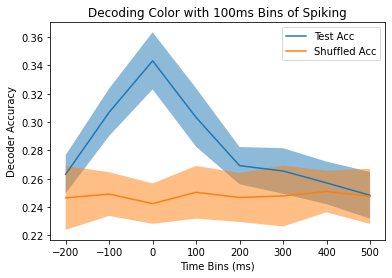

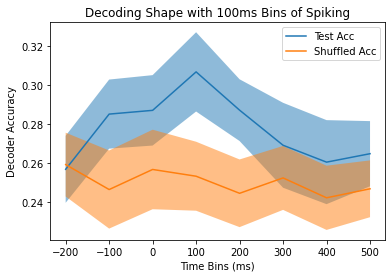

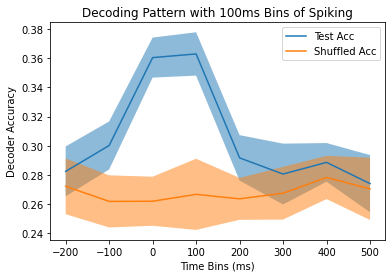

In [4]:
pre_interval = 300
post_interval = 500
feature_dims = ["Color", "Shape", "Pattern"]

for feature_dim in feature_dims:
    acc = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_accs_{pre_interval}_filtered_fixationend_{post_interval}_by_bin_random_split.npy"))
    shuffled = np.load(fs.open(f"l2l.pqz317.scratch/{feature_dim}_shuffled_accs_{pre_interval}_filtered_fixationend_{post_interval}_by_bin_random_split.npy"))

    # generate figures
    fig, ax = plt.subplots()
    visualization_utils.visualize_accuracy_across_time_bins(
        acc,
        pre_interval, post_interval, 100,
        ax,
        label="Test Acc",
        right_align=True
    )
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled,
        pre_interval, post_interval, 100,
        ax,
        label="Shuffled Acc",
        right_align=True
    )
    ax.set_xlabel("Time Bins (ms)")
    ax.set_ylabel("Decoder Accuracy")
    ax.set_title(f"Decoding {feature_dim} with 100ms Bins of Spiking")
    ax.legend()